In [15]:
import pandas as pd

auto = pd.read_csv ('/home/andrw/script/repository/ycbs255/jupyter/data/Auto.csv',na_values=['?'],na_filter=True)
auto_full = pd.read_csv ('/home/andrw/script/repository/ycbs255/jupyter/data/Auto.csv')
auto_full.head(n=10)



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [33]:
auto = auto.dropna()
auto.head(n=10)
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


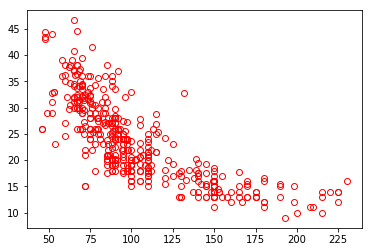

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(auto['horsepower'],auto['mpg'],'or',mfc='none')

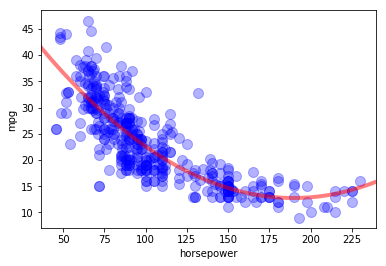

In [30]:
import seaborn as sns
sns.regplot(x="horsepower",y="mpg",data=auto,ci=True,scatter_kws={"color":"b","alpha":0.3,"s":100},
            line_kws={"color":"r","alpha":0.5,"lw":4},marker="o",order=2) # order parameter is the polinomial regression model



In [36]:
import numpy as np
import statsmodels.formula.api as smf

model = smf.ols(formula='mpg ~ horsepower', data=auto)
model_2 = smf.ols(formula='mpg ~ horsepower + np.power(horsepower,2)',data =auto) 
lr1 = model.fit()
lr1.summary2()
lr2 = model_2.fit()

print('the result for model 2 is: {}'.format(lr2.aic))  # cross validation for stats model
print('the result for model 1 is : {}'.format(lr1.aic)) # cross validation for stats model

the result for model 2 is: 2272.353522359692
the result for model 1 is : 2361.3236578374017


In [37]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
loo = LeaveOneOut() # leave the data out
loo.get_n_splits(auto) # split randmnly the dataset

392

In [39]:
X = auto[['horsepower']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression() 
    lr = lr.fit(X[train_i], y[train_i])
    rss[i]=(lr.predict(X[test_i]) - y[test_i])**2
    i= i + 1
# mse is the squared error for each sample in the test set.
print('error sum for cross validation one leave out {}'.format(np.sum(rss)))

error sum for cross validation one leave out 9498.753299028256


In [48]:
from sklearn.model_selection import KFold # cross validation K Fold
X = auto[['horsepower','displacement']].values
k = 5
rss = np.zeros(k)
kf = KFold(n_splits=k,shuffle=True)
i =0
for train_i, test_i in kf.split(auto):
    lr = LinearRegression() 
    lr = lr.fit(X[train_i], y[train_i])
    rss[i]=np.sum((lr.predict(X[test_i]) - y[test_i])**2) # sum of errors for every chunk of data 
    i= i + 1
print('error sum for cross validation KFlod {}'.format(np.sum(rss)))

error sum for cross validation KFlod 8233.531029041582
